In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline

In [2]:
pc.config.cloudy_exe

'cloudy.exe'

In [3]:
Min = pc.CloudyInput('../models/hii_Um3')

In [4]:
Min.set_BB?

In [5]:
Min.set_BB(Teff=56000, lumi_unit='ionisation parameter', lumi_value=-3)

In [6]:
Min.set_cste_density(3)

In [7]:
Min.set_abund(predef='HII region')

In [8]:
Min.set_iterate()

In [9]:
Min.set_other(('cosmic ray background', 'element limit off -8', 'print line optical depth'))

In [10]:
Min.set_distance(1.)

In [11]:
Min.print_input()

In [13]:
!cat ../models/hii_Um3.in

////////////////////////////////////
title hii_Um3
////////////////////////////////////
set punch prefix "hii_Um3"
Blackbody 56000.000000
ionisation parameter = -3.000
hden = 3.000
filling factor = 1.0
abundances HII region no grains
distance = 1000.0 parsecs linear
iterate
cosmic ray background
element limit off -8
print line optical depth
save last radius ".rad"
save last continuum ".cont"
save last physical conditions ".phy"
save last overview ".ovr"
save last heating ".heat"
save last cooling ".cool"
save last optical depth ".opd"
save last element hydrogen ".ele_H"
save last element helium ".ele_He"
save last element carbon ".ele_C"
save last element nitrogen ".ele_N"
save last element oxygen ".ele_O"
save last element argon ".ele_Ar"
save last element neon ".ele_Ne"
save last element sulphur ".ele_S"
save last element chlorin ".ele_Cl"
save last element iron ".ele_Fe"
save last element silicon ".ele_Si"


In [14]:
Min.run_cloudy()

In [15]:
M = pc.CloudyModel?

In [ ]:
M = pc.CloudyModel

In [16]:
M = pc.CloudyModel

In [17]:
M = pc.CloudyModel('../models/hii_Um3')

warng CloudyModel ../models/hii_Um3: ../models/hii_Um3.emis does not exist.


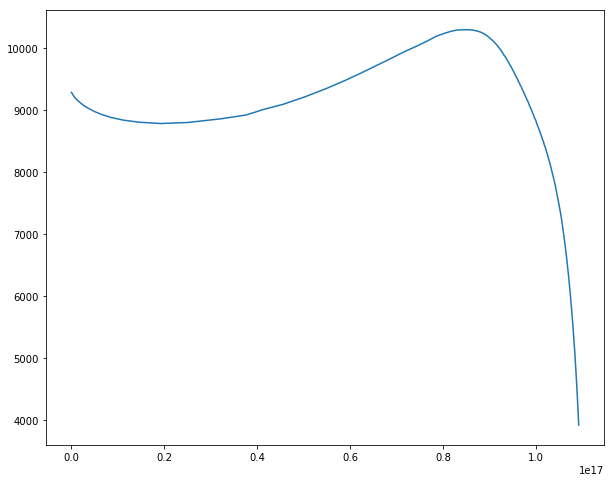

In [18]:
f, ax = plt.subplots(figsize=(10,8))
ax.plot(M.depth, M.te);

In [19]:
M.print_stats()

 Name of the model: ../models/hii_Um3
 R_in (cut) = 1.000e+30 (1.000e+30), R_out (cut) = 1.000e+30 (1.000e+30)
 H+ mass = 9.88e+23, H mass = 1.16e+24
 <H+/H> = 0.95, <He++/He> = 0.00, <He+/He> = 0.95
 <O+++/O> = 0.00, <O++/O> = 0.35, <O+/O> = 0.59
 <N+++/O> = 0.00, <N++/O> = 0.44, <N+/O> = 0.53
 T(O+++) = 8982, T(O++) = 9070, T(O+) = 9470
 <ne> = 942,  <nH> = 1000, T0 = 9328, t2=0.0035
 <log U> = -3.00


In [20]:
M.plot_spectrum?

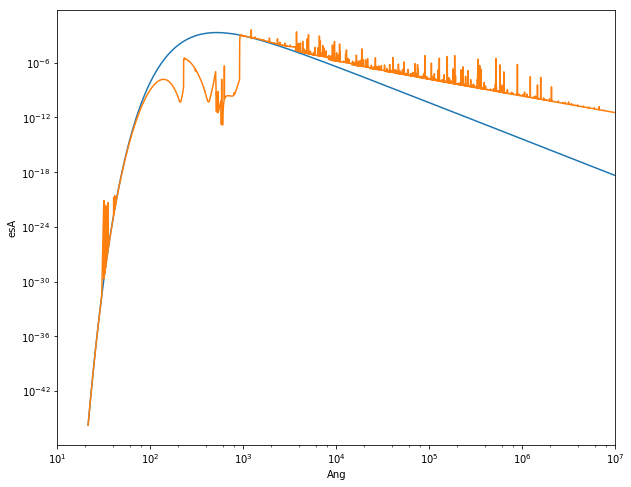

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
M.plot_spectrum(ax=ax, cont='incid', xunit='Ang', yunit='esA')
M.plot_spectrum(ax=ax, xunit='Ang', yunit='esA')
ax.set_xlim((10, 1e7));

In [22]:
Min.set_stop('thickness {}'.format(np.log10(8.5e16)))
Min.model_name = '../models/hii_Um3_cut'

In [23]:
Min.print_input()

In [24]:
Min.run_cloudy()

In [25]:
M2 = pc.CloudyModel('../models/hii_Um3_cut')

warng CloudyModel ../models/hii_Um3_cut: ../models/hii_Um3_cut.emis does not exist.


In [26]:
print(M.thickness, M2.thickness)

1.09218989e+17 8.4693989e+16


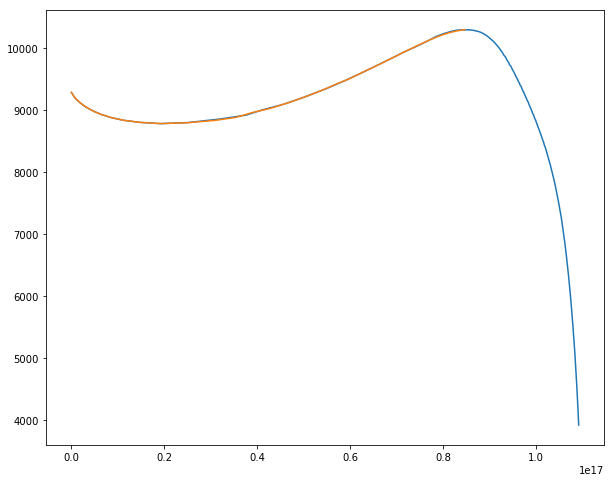

In [27]:
f, ax = plt.subplots(figsize=(10,8))
ax.plot(M.depth, M.te)
ax.plot(M2.depth, M2.te)

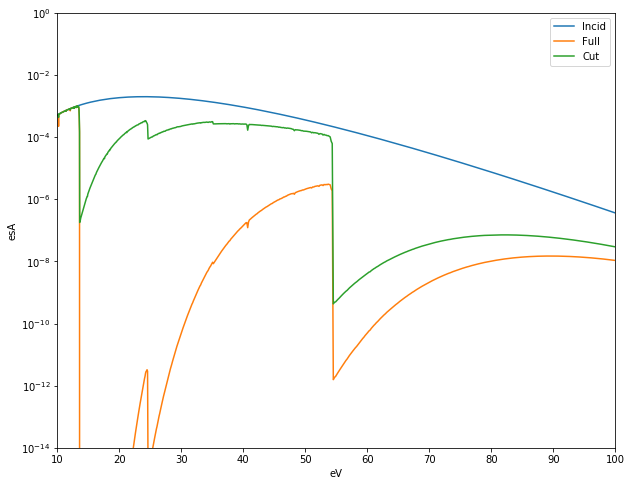

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
M.plot_spectrum(ax=ax, cont='incid', xunit='eV', yunit='esA', xlog=False, label='Incid')
M.plot_spectrum(ax=ax, cont='trans', xunit='eV', yunit='esA', xlog=False, label='Full')
M2.plot_spectrum(ax=ax, cont='trans', xunit='eV', yunit='esA', xlog=False, label='Cut')
ax.legend()
ax.set_xlim((10, 100))
ax.set_ylim((1e-14, 1e0));

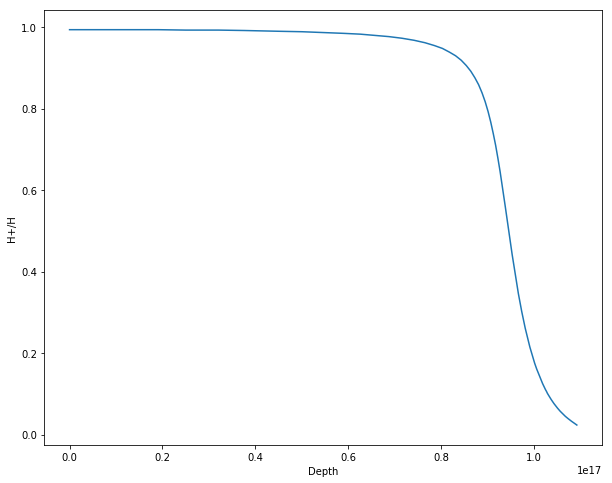

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
ax.plot(M.depth, M.get_ionic('H', 1))
ax.set_xlabel('Depth')
ax.set_ylabel('H+/H')